In [114]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Adjust the URI based on your Neo4j instance
username = "neo4j"              # Neo4j username
password = "P@$$W0rd!"           # Neo4j password

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

query = 'MATCH(n) RETURN COUNT(n)'
with driver.session() as session:
    result = session.run(query)
    print (result.single()["COUNT(n)"])

332973


In [220]:
import neo4j
import pandas
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))
query2 = '''
CALL db.labels() YIELD label
CALL apoc.cypher.run( 'MATCH (: ' + label + ') RETURN count(*) as count', {} )
YIELD value
RETURN label AS Label, value.count AS Count
'''
df = driver.execute_query(
    query2,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)
df

,Label,Count
0,Client,2433
1,Bank,3
2,Merchant,347
3,Mule,433
4,CashIn,149037
5,CashOut,76023
6,Debit,4392
7,Payment,74577
8,Transfer,19460
9,Transaction,323489


In [222]:
import neo4j
import pandas
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

query2 = '''
CALL db.labels() YIELD label
CALL apoc.cypher.run( 'MATCH (: ' + label + ') RETURN count(*) as count', {} )
YIELD value
RETURN label AS Label, value.count AS Count
'''

def get_node_labels(driver):
    with driver.session() as session:
        labels = []
        counts = []
        query_results = {}
        result = session.run(query2)
        
        for record in result:
            labels.append(record["Label"])  # Show the results
            counts.append(record["Count"])
            query_results = "Label:" + str(labels) + ", Count:" + str(counts)
            #print(query_results)
        return query_results 
    driver.close()
get_node_labels(driver)

"Label:['Client', 'Bank', 'Merchant', 'Mule', 'CashIn', 'CashOut', 'Debit', 'Payment', 'Transfer', 'Transaction', 'Email', 'SSN', 'Phone', 'SecondPartyFraudster'], Count:[2433, 3, 347, 433, 149037, 76023, 4392, 74577, 19460, 323489, 2229, 2238, 2234, 17]"

In [224]:
import neo4j
import pandas
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

query2 = '''
MATCH (:Bank) RETURN count(*) as count
'''
df = driver.execute_query(
    query2,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)
df

,count
0,3


In [226]:
import neo4j
import pandas
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

query2 = '''
CALL db.relationshipTypes() YIELD relationshipType AS type
CALL apoc.cypher.run( 'MATCH ()-[: ' + type + ']-> () RETURN count(*)
AS count', {} )
YIELD value
RETURN type AS Relationship, value.count AS Count
'''
df = driver.execute_query(
    query2,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)
df

,Relationship,Count
0,PERFORMED,323489
1,TO,323489
2,HAS_SSN,2433
3,HAS_EMAIL,2433
4,HAS_PHONE,2433
5,FIRST_TX,2332
6,LAST_TX,2332
7,NEXT,321157
8,SHARED_PII,759
9,SIMILAR_TO,1518


In [314]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to get nodes and extract key-value pairs
def extract_node_properties():
    nodes = []  # List to store nodes
    with driver.session() as session:
        # Query to fetch relationships and their connected nodes
        query = """
        MATCH p = (:Client)-[s:SHARED_PII]->(:Client)
        WHERE s.count >= 2
        RETURN s, nodes(p) AS nodes
        """
        result = session.run(query)
        
        for record in result:
            relationship = record["s"]  # Show the SHARED_PII relationship
            node_list = record["nodes"]  # Show the tuple of nodes
            
            # Process each node in the relationship
            for node in node_list:
                node_data = {
                    "element_id": node.id,
                    "labels": list(node.labels),
                    "properties": dict(node)
                }
                nodes.append(node_data)
    
    # Print extracted nodes for verification
    for node in nodes:
        print(f"Node ID: {node['element_id']}")
        print(f"Labels: {node['labels']}")
        print(f"Properties: {node['properties']}")
        print("-" * 40)

# Call the function to extract key-value pairs from nodes
extract_node_properties()

# Close the driver connection
driver.close()


Node ID: 129
Labels: ['Client', 'Mule']
Properties: {'name': 'Evan Pacheco', 'id': '4307389536474215'}
----------------------------------------
Node ID: 318883
Labels: ['Client', 'Mule']
Properties: {'name': 'Tristan Griffith', 'id': '4297626800379477'}
----------------------------------------
Node ID: 1000
Labels: ['Client', 'Mule']
Properties: {'name': 'Sydney Jacobson', 'id': '4047841290742877'}
----------------------------------------
Node ID: 324553
Labels: ['Client', 'Mule']
Properties: {'name': 'Grayson Palmer', 'id': '4361847869567817'}
----------------------------------------
Node ID: 1000
Labels: ['Client', 'Mule']
Properties: {'name': 'Sydney Jacobson', 'id': '4047841290742877'}
----------------------------------------
Node ID: 324526
Labels: ['Client', 'Mule']
Properties: {'name': 'Jack Finch', 'id': '4187135907098538'}
----------------------------------------
Node ID: 1075
Labels: ['Client', 'Mule']
Properties: {'name': 'Mia Huff', 'id': '4001923623053182'}
---------------

C:\Users\henry\AppData\Local\Temp\ipykernel_24096\3403343137.py:30: DeprecationWarning: `id` is deprecated, use `element_id` instead
  "element_id": node.id,


In [230]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))
query3 = '''
MATCH ( t:Transaction ) WITH count(t) AS globalCnt 
UNWIND ["CashIn", "CashOut", "Payment", "Debit", "Transfer"] AS txType 
CALL apoc.cypher.run( "MATCH (t:" + txType + ")	
RETURN count(t) AS txCnt", {} )	YIELD value	 
RETURN txType, value.txCnt AS NumberOfTransactions, round( toFloat(value.txCnt) / toFloat(globalCnt), 2) AS `%Transactions` 
ORDER BY `%Transactions` DESC;
'''	
pandas_df = driver.execute_query(
    query3,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
pandas_df

,txType,NumberOfTransactions,%Transactions
0,CashIn,149037,0.46
1,CashOut,76023,0.24
2,Payment,74577,0.23
3,Transfer,19460,0.06
4,Debit,4392,0.01


In [21]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
gds = GraphDataScience(URI, auth=AUTH)
create_graph_query = '''
MATCH (c:Client)-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-> (n) <-
[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client)
WHERE id(c) < id(d)
RETURN c.id, d.id, count(*) AS freq
ORDER BY freq DESC
'''
G = gds.run_cypher(create_graph_query)

df = driver.execute_query(
    create_graph_query,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)
df

<class 'pandas.core.frame.DataFrame'>


,c.id,d.id,freq
0,4952527271473904,4816336012071985,3
1,4883445100935916,4708373581412325,3
2,4658150168863397,4100374538108184,3
3,4673951123644611,4795773320377768,3
4,4192214340630620,4912097363222923,3
...,...,...,...
754,4910140986334626,4114683318919154,1
755,4454780847105236,4210575070378533,1
756,4721862020593706,4210575070378533,1
757,4445521165797820,4210575070378533,1


In [234]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))

query1='''
CALL db.labels() YIELD label 
CALL apoc.cypher.run( "MATCH (: " + label + ") RETURN count(*) as count", {} ) YIELD value 
RETURN label AS Label, value.count AS Count;
'''
df = driver.execute_query(
    query1,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)
df

,Label,Count
0,Client,2433
1,Bank,3
2,Merchant,347
3,Mule,433
4,CashIn,149037
5,CashOut,76023
6,Debit,4392
7,Payment,74577
8,Transfer,19460
9,Transaction,323489


In [13]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))

query2 = '''
CALL db.relationshipTypes() 
YIELD relationshipType AS type CALL apoc.cypher.run( "MATCH ()-[: " + type + "]-> () RETURN count(*) AS count", {} ) 
YIELD value RETURN type AS Relationship, value.count AS Count;
'''

df = driver.execute_query(
    query2,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Relationship,Count
0,PERFORMED,323489
1,TO,323489
2,HAS_SSN,2433
3,HAS_EMAIL,2433
4,HAS_PHONE,2433
5,FIRST_TX,2332
6,LAST_TX,2332
7,NEXT,321157


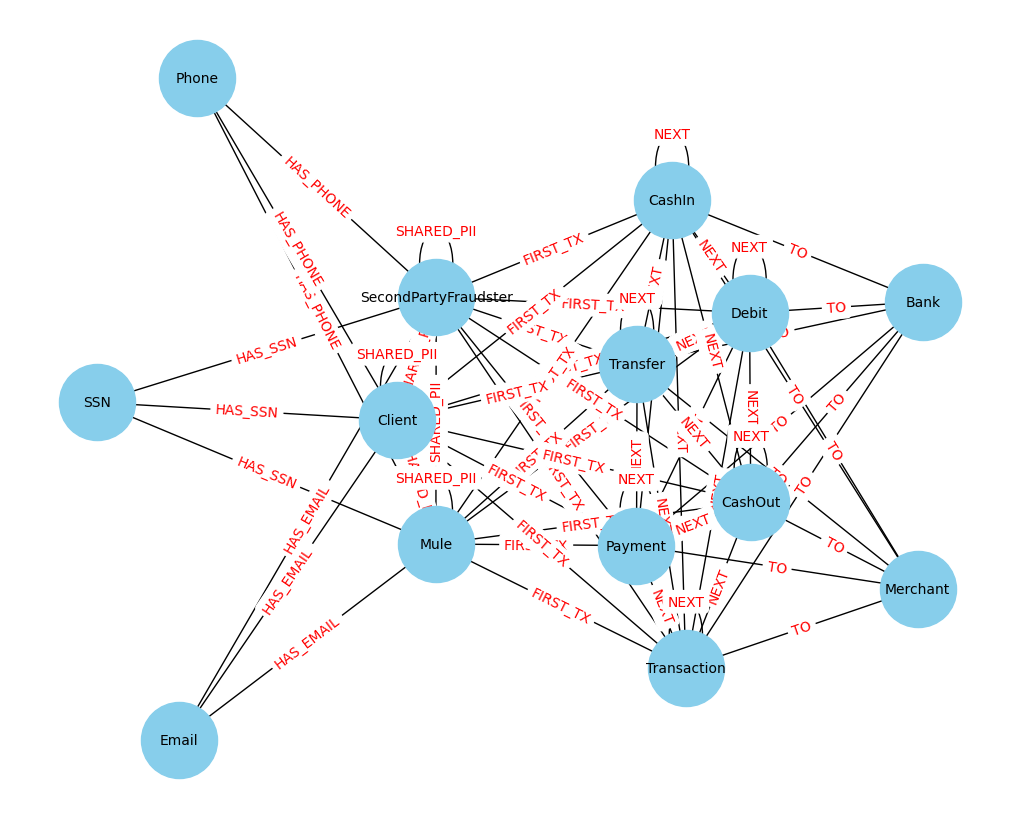

In [92]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Adjust the URI based on your Neo4j instance
username = "neo4j"              # Neo4j username
password = "P@$$W0rd!"           # Neo4j password

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))
    
# Function to visualize the schema graph using NetworkX
def visualize_schema_graph():
    with driver.session() as session:
        result = session.run("CALL db.schema.visualization()")
        nodes = []
        relationships = []
        
        # Process result
        for record in result:
            nodes.extend(record['nodes'])
            relationships.extend(record['relationships'])

    # Create a NetworkX graph
    G = nx.Graph()
       
    #   Add nodes to the graph
    for node in nodes:
            #print(node.get('name'))
            G.add_node(node.element_id, label=node.get('name'))
    
    # Add relationships to the graph
    for relationship in relationships:
        #print(relationship.get('name'))
        G.add_edge(relationship.start_node.element_id, relationship.end_node.element_id, label=relationship.get('name'))

    # Draw the graph using Matplotlib
    pos = nx.spring_layout(G)  # Layout for visualization
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
    
    # Draw edge labels (relationship types)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.show()

# Call the function to visualize the schema graph
visualize_schema_graph()

# Close the driver connection
driver.close()    

In [135]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))
	
query4 = 'MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client) WHERE id(c) < id(d) RETURN c.id, d.id, count(*) AS freq ORDER BY freq DESC'

pandas_df = driver.execute_query(
    query4,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
pandas_df

,c.id,d.id,freq
0,4952527271473904,4816336012071985,3
1,4883445100935916,4708373581412325,3
2,4658150168863397,4100374538108184,3
3,4673951123644611,4795773320377768,3
4,4192214340630620,4912097363222923,3
...,...,...,...
754,4910140986334626,4114683318919154,1
755,4454780847105236,4210575070378533,1
756,4721862020593706,4210575070378533,1
757,4445521165797820,4210575070378533,1


In [240]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))
query5 = '''
MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[:HAS_EMAIL|HAS_PHONE|HAS_SSN ]-( d:Client )WHERE id(c) <> id(d) 
RETURN count(DISTINCT c.id) AS freq
'''

df = driver.execute_query(
    query5,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
df

,freq
0,336


In [238]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))
query6 = '''
MATCH ( c:Client )-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ] -> (n) <-
[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]- ( d:Client )
WHERE id(c) < id(d)
WITH c, d, count(*) AS cnt
MERGE (c) - [ :SHARED_PII { count: cnt } ] -> (d);
'''

df = driver.execute_query(
    query6,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
df

""


In [252]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

query7="MATCH p = (:Client) - [s:SHARED_PII] -> (:Client) WHERE s.count >= 2 RETURN Count(p)"
pandas_df = driver.execute_query(
    query7,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
pandas_df

,Count(p)
0,276


In [48]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
gds = GraphDataScience(URI, auth=AUTH)
#with driver.session() as session:
query1='''
       CALL gds.graph.drop('clientClusters')
       '''
graph_projection_query = '''
CALL gds.graph.project(
'clientClusters' ,
            { Client: {
               label: 'Client' }
            },
            { SHARED_PII: {
                    type: 'SHARED_PII',
             orientation: 'UNDIRECTED',
              properties: {
                       count: {
                    property: 'count' }
                        }
                    }
                })
YIELD graphName, nodeCount, relationshipCount
'''
query2 = '''
        CALL gds.graph.project(
                'clientClusters' ,
                { Client: {
                   label: 'Client' }},
                { SHARED_PII: { type: 'SHARED_PII',
                 orientation: 'UNDIRECTED',
                  properties: { count: { property: 'count' }
                            }
                        }
                })
YIELD graphName, nodeCount, relationshipCount
 
        CALL gds.wcc.stream('clientCluster', {
             nodeLabels: ['Client'],
             relationshipTypes: ['SHARED_PII'],
             consecutiveIds: true
        })
        YIELD nodeId, componentId
        RETURN gds.util.asNode(nodeId).id AS clientId, componentId AS clusterId
''' 
gds.run_cypher(graph_projection_query)

,graphName,nodeCount,relationshipCount
0,clientClusters,2433,1518


In [145]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('clientClusters')
'''
query2 = '''
        CALL gds.graph.list()
        YIELD graphName AS namedGraph
        CALL gds.wcc.stream(namedGraph, {
             nodeLabels: ['Client'],
             relationshipTypes: ['SHARED_PII'],
             consecutiveIds: true
        })
        YIELD nodeId, componentId
        WITH gds.util.asNode(nodeId) AS clientId , componentId AS clusterId
        WITH clusterId, collect(clientId.id) AS clients
        WITH clusterId, clients, size(clients) AS clusterSize WHERE clusterSize >= 2
        UNWIND clients AS client
        MATCH (c:Client) WHERE c.id = client
        SET c.secondPartyFraudRing = clusterId RETURN clusterId, client
        '''
df = driver.execute_query(
query2,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,clusterId,client
0,37,4307389536474215
1,37,4454357737255718
2,37,4227754063695630
3,37,4297626800379477
4,248,4026791806639957
...,...,...
331,2146,4327866489611139
332,2146,4782864771011264
333,2146,4968593889682429
334,2146,4988199250113857


In [3]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Adjust the URI based on your Neo4j instance
username = "neo4j"              # Neo4j username
password = "P@$$W0rd!"           # Neo4j password

# Connect to Neo4j database
driver = GraphDatabase.driver("bolt://localhost:7687", auth=(username, password))

def get_node_labels(tx, node_id):
    result = tx.run("MATCH (n) WHERE id(n) = $node_id RETURN labels(n) AS labels", node_id=node_id)
    record = result.single()
    return record["labels"] if record else []

with driver.session() as session:
    labels = session.execute_read(get_node_labels, 123)  # Replace 123 with the actual node ID
    print(labels)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 1, column: 17, offset: 16} for query: 'MATCH (n) WHERE id(n) = $node_id RETURN labels(n) AS labels'


['Merchant']


In [50]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('clientClusters')
'''
query3 = '''
        CALL gds.wcc.stream('clientClusters', {
               nodeLabels: ['Client'],
        relationshipTypes: ['SHARED_PII'],
           consecutiveIds: true
                })
        YIELD nodeId, componentId
        WITH gds.util.asNode(nodeId) AS clientId , componentId AS clusterId
        WITH clusterId, collect(clientId.id) AS clients
        WITH clusterId, clients, size(clients) AS clusterSize WHERE clusterSize > 2
        UNWIND clients AS client
        MATCH (c:Client) WHERE c.id = client
        SET c.secondPartyFraudRing = clusterId
        RETURN c.id, c.secondPartyFraudRing
        '''
df = driver.execute_query(
query3,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,c.id,c.secondPartyFraudRing
0,4307389536474215,37
1,4454357737255718,37
2,4227754063695630,37
3,4297626800379477,37
4,4047841290742877,334
...,...,...
325,4327866489611139,2146
326,4782864771011264,2146
327,4968593889682429,2146
328,4988199250113857,2146


In [61]:
URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('similarity')
'''
query4 = '''
MATCH (c:Client) WHERE c.secondPartyFraudRing is NOT NULL
WITH collect(c) as clients
MATCH (n) WHERE n:Email OR n:Phone OR n:SSN
WITH clients, collect(n) AS piis
WITH clients + piis AS nodes
MATCH (c:Client) -[:HAS_EMAIL|HAS_PHONE|HAS_SSN]->(p)
WHERE c.secondPartyFraudRing is NOT NULL
WITH nodes, collect({source: c, target: p}) as relationships
CALL gds.graph.project.cypher(
'similarity',
"UNWIND $nodes as n
RETURN id(n) AS id,labels(n) AS labels",
"UNWIND $relationships as r
RETURN id(r['source']) AS source, id(r['target']) AS target,
'HAS_PII' as type",
{ parameters:
{ nodes: nodes,
relationships: relationships }
}
)
YIELD graphName, nodeCount, relationshipCount
RETURN graphName, nodeCount, relationshipCount
        '''
df = driver.execute_query(
query4,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,graphName,nodeCount,relationshipCount
0,similarity,7037,1008


In [63]:
URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('similarity')
'''
query4 = '''
CALL gds.nodeSimilarity.mutate('similarity', {
            mutateProperty: 'jaccardScore',
	mutateRelationshipType: 'SIMILAR_TO' ,
	                  topK: 15
})
YIELD nodesCompared, relationshipsWritten
        '''
df = driver.execute_query(
query4,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,nodesCompared,relationshipsWritten
0,336,1518


In [65]:
URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('similarity')
'''
query4 = '''
CALL gds.graph.relationship.write(
      'similarity',
      'SIMILAR_TO')
YIELD
    graphName, relationshipType, relationshipProperty, relationshipsWritten, propertiesWritten
'''
df = driver.execute_query(
query4,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,graphName,relationshipType,relationshipProperty,relationshipsWritten,propertiesWritten
0,similarity,SIMILAR_TO,None,1518,0


In [69]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('similarity')
'''
query4 = '''
CALL gds.degree.write('similarity', { 
						nodeLabels: ['Client'],
				 relationshipTypes: ['SIMILAR_TO'],
        relationshipWeightProperty: 'jaccardScore',
                     writeProperty: 'secondPartyFraudScore'
})
YIELD centralityDistribution, nodePropertiesWritten
RETURN centralityDistribution.min AS minimumScore, centralityDistribution.mean AS meanScore, nodePropertiesWritten
'''
df = driver.execute_query(
query4,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,minimumScore,meanScore,nodePropertiesWritten
0,0.2,1.5125,336


In [77]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('similarity')
'''
query4 = '''
MATCH (c:Client)
WHERE c.secondPartyFraudScore IS NOT NULL
WITH percentileCont(c.secondPartyFraudScore, 0.95) AS threshold
MATCH (c:Client)
WHERE c.secondPartyFraudScore > threshold
SET c:SecondPartyFraudster
RETURN c.id, c.name, threshold 
'''
df = driver.execute_query(
query4,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,c.id,c.name,threshold
0,4029043591201321,Brooklyn Harrison,2.725
1,4583937317122539,Aiden Hurst,2.725
2,4912587051525728,Sarah Klein,2.725
3,4446118457512030,Kennedy Keith,2.725
4,4717521340444448,Samantha Mueller,2.725
5,4189330002136246,Benjamin Moss,2.725
6,4024985944102082,Charlotte Foster,2.725
7,4614177132519923,Ryan Patel,2.725
8,4359490519123048,Landon Welch,2.725
9,4371660075922934,Allison Alvarez,2.725


In [79]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
query1='''
CALL gds.graph.drop('similarity')
'''
query4 = '''
MATCH (c:Client)
WHERE c:SecondPartyFraudster
RETURN c.id, c.name 
'''
df = driver.execute_query(
query4,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df)
df

,c.id,c.name
0,4029043591201321,Brooklyn Harrison
1,4583937317122539,Aiden Hurst
2,4912587051525728,Sarah Klein
3,4446118457512030,Kennedy Keith
4,4717521340444448,Samantha Mueller
5,4189330002136246,Benjamin Moss
6,4024985944102082,Charlotte Foster
7,4614177132519923,Ryan Patel
8,4359490519123048,Landon Welch
9,4371660075922934,Allison Alvarez
